<a href="https://colab.research.google.com/github/zackcmariano/-Science-of-Words/blob/main/Book_Do_Mil_ao_Milh%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#INSTALLING WORDCLOUD
!pip install wordcloud -q

In [31]:
#IMPORTING THE NECESSARY PACKAGES
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [32]:
#IMPORT THE COMPLETE BOOK FILE
DATA_PATH = "https://raw.githubusercontent.com/zackcmariano/-Science-of-Words/main/domilaomilhao.csv"

book = pd.read_csv(DATA_PATH)

In [33]:
book.columns

Index(['DoMilAoMilhao'], dtype='object')

In [34]:
#MISSING VALUES
print("Valores ausentes: ", book.DoMilAoMilhao.isnull().sum())

#ELIMINATING MISSING VALUES
DoMilAoMilhao = book.dropna(subset=['DoMilAoMilhao'], axis=0 )['DoMilAoMilhao']

Valores ausentes:  555


In [35]:
#CONCATENATE THE WORDS
#TOTAL WORDS IN THE BOOK
DoMilAoMilhao = " ".join(s for s in DoMilAoMilhao)
print("Quantidade de Palavras no livro: {}".format(len(DoMilAoMilhao)))



Quantidade de Palavras no livro: 340409


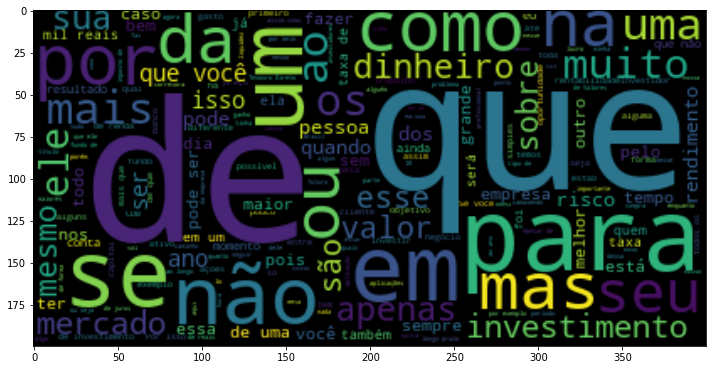

In [36]:
#STOPWORD LIST
stopwords = set(STOPWORDS)

#GENERATE A WORDCLOUD
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(DoMilAoMilhao)

#SHOWING THE FINAL IMAGE
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

In [39]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

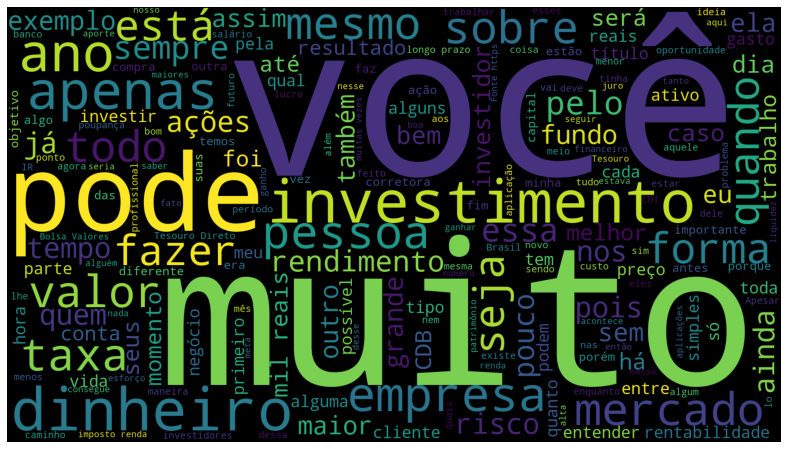

In [40]:
stopwords = set(STOPWORDS)
stopwords.update(["em", "uma", "um", "para", "de", "não", "que", "são", "ao", 
                  "na", "se", "por", "como", "seu", "da", "mais", "mas", "ou", 
                  "ele", "os", "dos", "sua", "ter", "esse", "isso", "ser"])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=900).generate(DoMilAoMilhao)

fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)

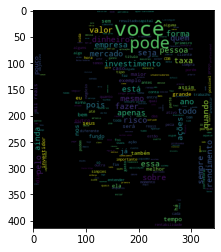

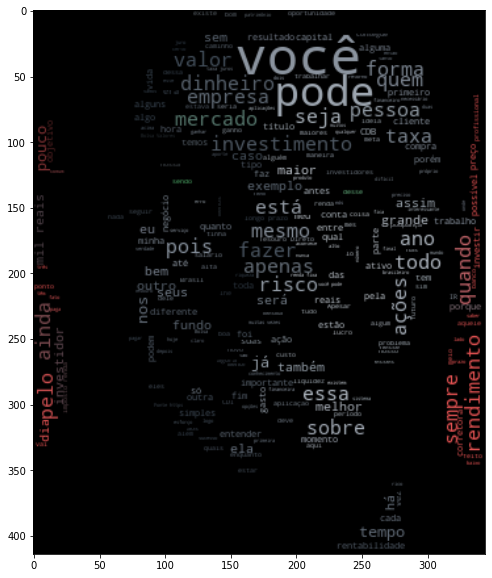

In [76]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, ImageColorGenerator


#LOAD BOOK
text = DoMilAoMilhao

#LOAD IMAGE COLOR
book_color = np.array(Image.open(os.path.join(d, "primorico.png")))
book_color = book_color[::3, ::3]

#CREATE MASK
book_mask = book_color.copy()
book_mask[book_mask.sum(axis=2) == 0] = 255

stopwords = set(STOPWORDS)
stopwords.update(["em", "uma", "um", "para", "de", "não", "que", "são", "ao", 
                  "na", "se", "por", "como", "seu", "da", "mais", "mas", "ou", 
                  "ele", "os", "dos", "sua", "ter", "esse", "isso", "ser", "muito"])

edges = np.mean([gaussian_gradient_magnitude(book_color[:, :, i] / 255., 2) 
for i in range(3)], axis=0)
book_mask[edges > .08] = 255

#CREATE WORD CLOUD
wc = WordCloud(stopwords=stopwords, max_words=2000, mask=book_mask, 
               max_font_size=40, random_state=42, relative_scaling=0)

#GENERATE WORD CLOUD
wc.generate(text)
plt.imshow(wc)

#CREATE IMAGE
image_colors = ImageColorGenerator(book_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("book_new.png")


plt.show()